In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Import the data
df = pd.read_csv('./data/dataset_mood_smartphone.csv')
df_base = pd.read_csv('./data/dataset_mood_smartphone.csv')
df_base = df_base.drop('Unnamed: 0', axis=1)
df_base.loc[:,('time')] = pd.to_datetime(df_base.time)

# Create variables for the unique variables & ids used in the research
score_variables = df_base.variable.unique()[0:3]
other_variables = df_base.variable.unique()[3:]
all_variables = df_base.variable.unique()
ids = df_base.id.unique()
dates = pd.date_range(start=df_base.time.min().round('D'), end=df_base.time.max().round('D'), freq='D')


df['time'] = pd.to_datetime(df['time'])
df['variable'] = df['variable'].astype('category')
df['id'] = df['id'].astype('string')
print(df.head(20))

# Number of records and attributes
print(f"Number of records: {len(df)}")
print(f"Number of attributes: {len(df.columns)}")

# Number of individuals
print(f"Number of unique individuals :{len(df.id.unique())}")

# Datatypes of attributes
print("---")
print("Datatypes of attributes:")
print(df.dtypes)
print("---")

print("DF HEAD")
print(df.head)

# Range of values for numeric columns
print("Range of values for numeric columns:")
print(df.describe().loc[['min', 'max']])

# Distribution of values (descriptive statistics)
print("Distribution of values (descriptive statistics):")
print(df.describe())

# Find missing values
print("Missing values in each attribute:")
print(df.isnull().sum())


    Unnamed: 0       id                time variable  value
0            1  AS14.01 2014-02-26 13:00:00     mood    6.0
1            2  AS14.01 2014-02-26 15:00:00     mood    6.0
2            3  AS14.01 2014-02-26 18:00:00     mood    6.0
3            4  AS14.01 2014-02-26 21:00:00     mood    7.0
4            5  AS14.01 2014-02-27 09:00:00     mood    6.0
5            6  AS14.01 2014-02-27 12:00:00     mood    6.0
6            7  AS14.01 2014-02-27 15:00:00     mood    7.0
7            8  AS14.01 2014-03-21 09:00:00     mood    6.0
8            9  AS14.01 2014-03-21 11:00:00     mood    6.0
9           10  AS14.01 2014-03-21 15:00:00     mood    7.0
10          11  AS14.01 2014-03-21 19:00:00     mood    6.0
11          12  AS14.01 2014-03-21 21:00:00     mood    6.0
12          13  AS14.01 2014-03-22 08:00:00     mood    7.0
13          14  AS14.01 2014-03-22 12:00:00     mood    7.0
14          15  AS14.01 2014-03-22 15:00:00     mood    7.0
15          16  AS14.01 2014-03-22 18:00

In [11]:
missing_values_subset = df[df['value'].isna()]

missing_ids = missing_values_subset['id'].value_counts()
print(missing_ids)

missing_time_range = missing_values_subset['time'].agg(['min', 'max'])
print(missing_time_range)

missing_variables = missing_values_subset['variable'].value_counts()
print(missing_variables)

id
AS14.16    43
AS14.28    39
AS14.24    35
AS14.01    17
AS14.33    12
AS14.15    11
AS14.17    11
AS14.12    10
AS14.05     7
AS14.09     6
AS14.06     3
AS14.08     3
AS14.07     2
AS14.26     2
AS14.25     1
Name: count, dtype: Int64
min   2014-03-04 18:00:00
max   2014-06-07 12:00:00
Name: time, dtype: datetime64[ns]
variable
circumplex.valence      156
circumplex.arousal       46
activity                  0
appCat.communication      0
appCat.builtin            0
appCat.entertainment      0
appCat.finance            0
appCat.other              0
appCat.social             0
appCat.game               0
appCat.office             0
appCat.unknown            0
appCat.travel             0
appCat.weather            0
appCat.utilities          0
call                      0
mood                      0
screen                    0
sms                       0
Name: count, dtype: int64


In [12]:
#proportions of each unique value
df["variable"].value_counts(normalize = True)

,proportion
variable,
screen,0.256235
appCat.builtin,0.242200
appCat.communication,0.197065
appCat.entertainment,0.071966
activity,0.060929
appCat.social,0.050794
appCat.other,0.020297
circumplex.arousal,0.014972
circumplex.valence,0.014972


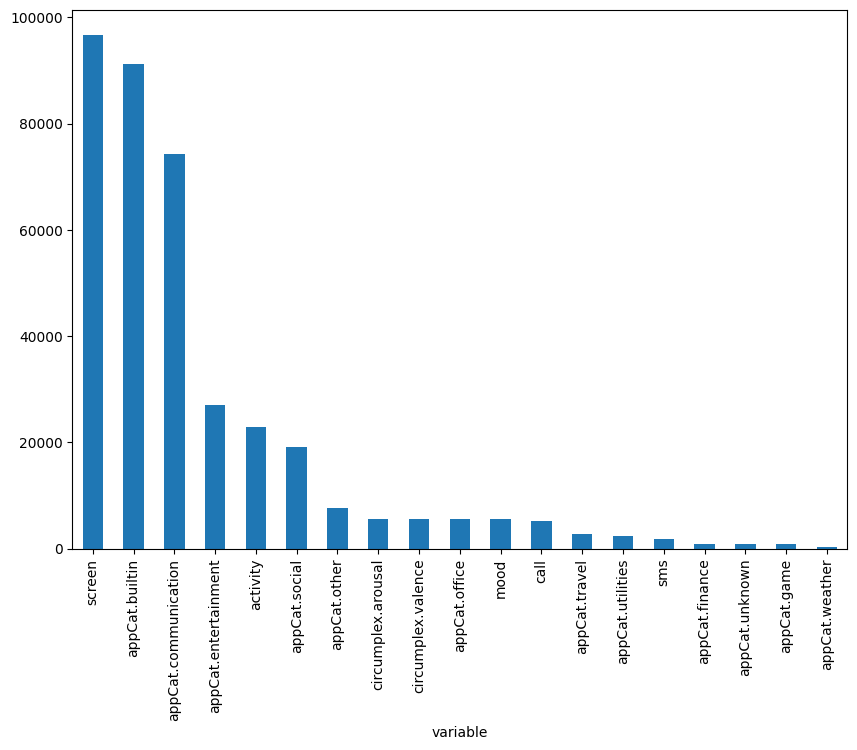

In [ ]:
# Variables with most observations
pd.DataFrame(df.variable.value_counts()).plot.bar(legend=None,figsize=(10,7));

Count of unique variable types and their record counts:
variable
screen                  96578
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
activity                22965
appCat.social           19145
appCat.other             7650
circumplex.arousal       5643
circumplex.valence       5643
appCat.office            5642
mood                     5641
call                     5239
appCat.travel            2846
appCat.utilities         2487
sms                      1798
appCat.finance            939
appCat.unknown            939
appCat.game               813
appCat.weather            255
Name: count, dtype: int64
['AS14.26', 'AS14.08', 'AS14.15', 'AS14.13', 'AS14.05']


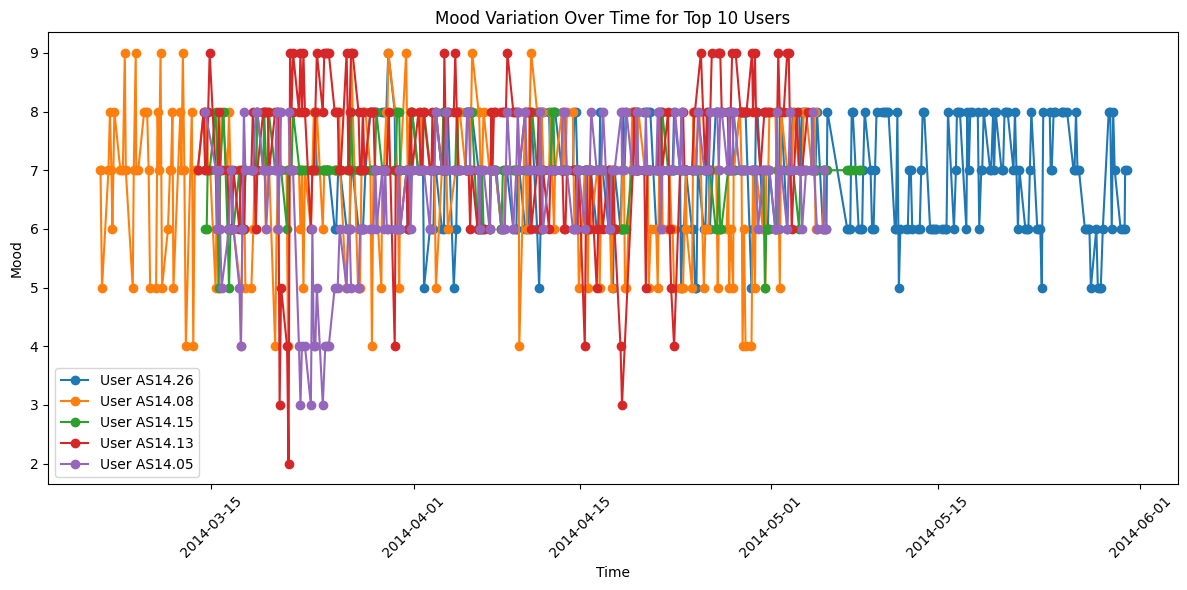

In [13]:
# Count unique variable types and their frequencies
print("Count of unique variable types and their record counts:")
variable_counts = df['variable'].value_counts()
print(variable_counts)

#### Individual User Trends: Mood over Time for top 10 users
# Filter for mood recordings only
df_mood = df[df['variable'] == 'mood'].copy()

# Count the number of mood records per user and get the top 10 users
top10_ids = df_mood['id'].value_counts().head(5).index.tolist()
print(top10_ids)

plt.figure(figsize=(12, 6))

# Plot mood variation for each top user
for user in top10_ids:
    df_user = df_mood[df_mood['id'] == user]
    plt.plot(df_user['time'], df_user['value'], marker='o', linestyle='-', label=f'User {user}')

plt.title('Mood Variation Over Time for Top 10 Users')
plt.xlabel('Time')
plt.ylabel('Mood')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

        date     value
0 2014-02-26  6.250000
1 2014-02-27  6.333333
2 2014-03-04  7.000000
3 2014-03-05  7.166667
4 2014-03-06  7.222222
5 2014-03-07  7.444444
6 2014-03-08  7.300000
7 2014-03-09  7.200000
8 2014-03-10  7.000000
9 2014-03-11  6.400000
         date     value  dayofweek  is_weekend
0  2014-02-26  6.250000          2       False
1  2014-02-27  6.333333          3       False
2  2014-03-04  7.000000          1       False
3  2014-03-05  7.166667          2       False
4  2014-03-06  7.222222          3       False
5  2014-03-07  7.444444          4       False
8  2014-03-10  7.000000          0       False
9  2014-03-11  6.400000          1       False
10 2014-03-12  6.700000          2       False
11 2014-03-13  7.083333          3       False
         date     value  dayofweek  is_weekend
6  2014-03-08  7.300000          5        True
7  2014-03-09  7.200000          6        True
13 2014-03-15  6.461538          5        True
14 2014-03-16  6.461538          6        

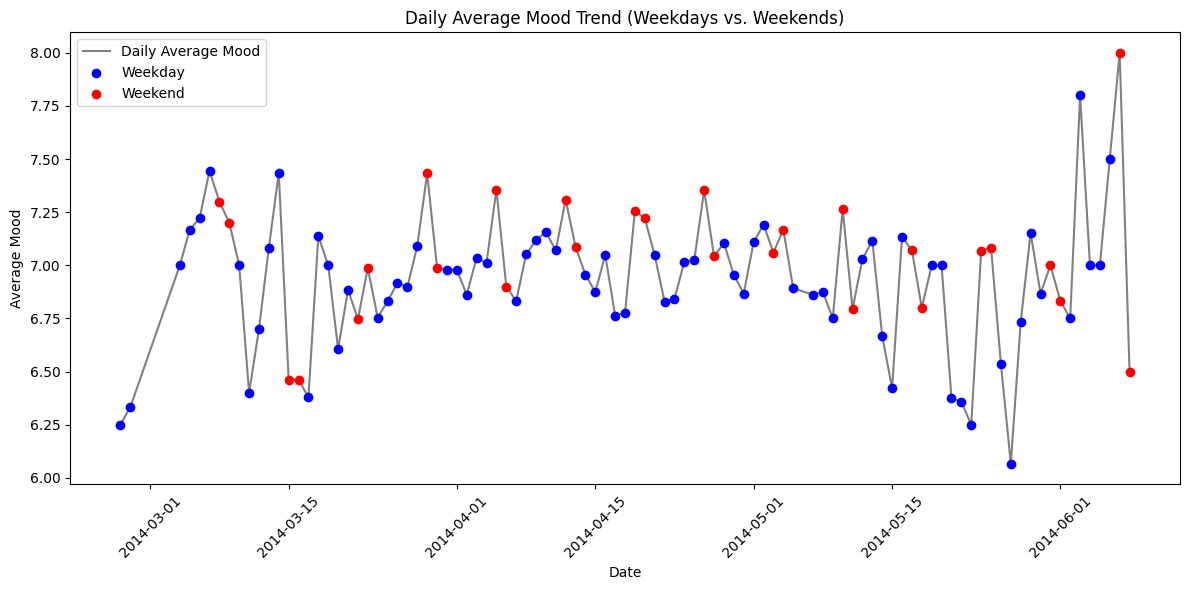

Weekday Average Mood: 6.90
Weekend Average Mood: 7.06


In [14]:
# -----------------------------
# Chart 2: Aggregated Daily Trends
# -----------------------------
# Create a new column for date (dropping the time part)
df_mood['date'] = df_mood['time'].dt.date

# Compute the daily average mood
daily_avg = df_mood.groupby('date')['value'].mean().reset_index()
daily_avg['date'] = pd.to_datetime(daily_avg['date'])
print(daily_avg.head(10))

# Determine if a day is a weekend (Saturday=5, Sunday=6)
daily_avg['dayofweek'] = daily_avg['date'].dt.dayofweek
daily_avg['is_weekend'] = daily_avg['dayofweek'] >= 5

# Separate data for weekdays and weekends
weekday_data = daily_avg[~daily_avg['is_weekend']]
weekend_data = daily_avg[daily_avg['is_weekend']]
print(weekday_data.head(10))
print(weekend_data.head(10))

# Plot the overall daily trend as a line
plt.figure(figsize=(12, 6))
plt.plot(daily_avg['date'], daily_avg['value'], linestyle='-', color='gray', label='Daily Average Mood')

# Overlay weekday and weekend points with different colors
plt.scatter(weekday_data['date'], weekday_data['value'], color='blue', label='Weekday', zorder=5)
plt.scatter(weekend_data['date'], weekend_data['value'], color='red', label='Weekend', zorder=5)

plt.title('Daily Average Mood Trend (Weekdays vs. Weekends)')
plt.xlabel('Date')
plt.ylabel('Average Mood')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate average mood for weekdays and weekends
weekday_avg = daily_avg[~daily_avg['is_weekend']]['value'].mean()
weekend_avg = daily_avg[daily_avg['is_weekend']]['value'].mean()
print(f"Weekday Average Mood: {weekday_avg:.2f}")
print(f"Weekend Average Mood: {weekend_avg:.2f}")

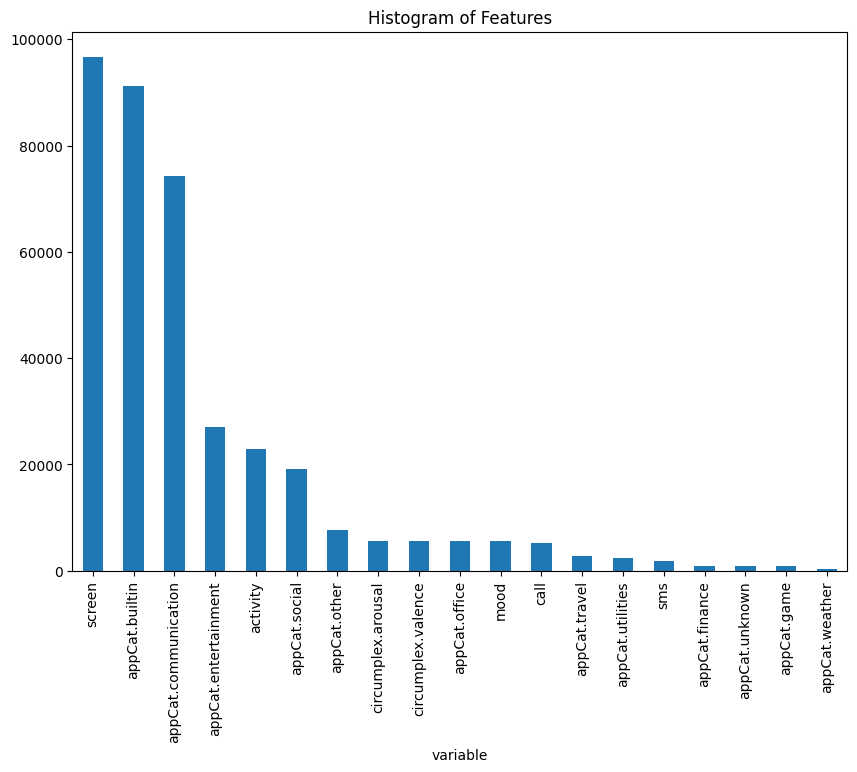

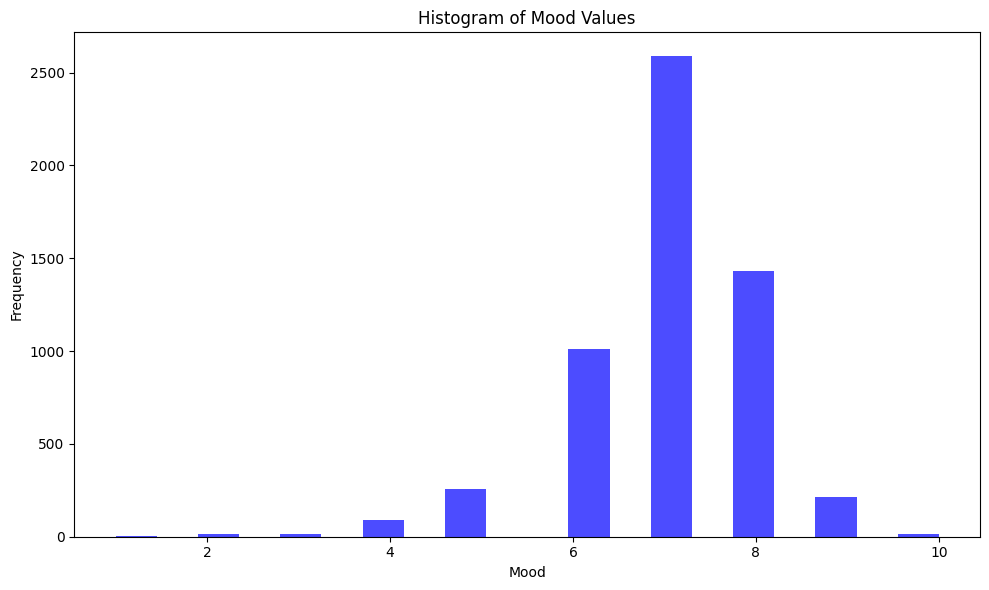

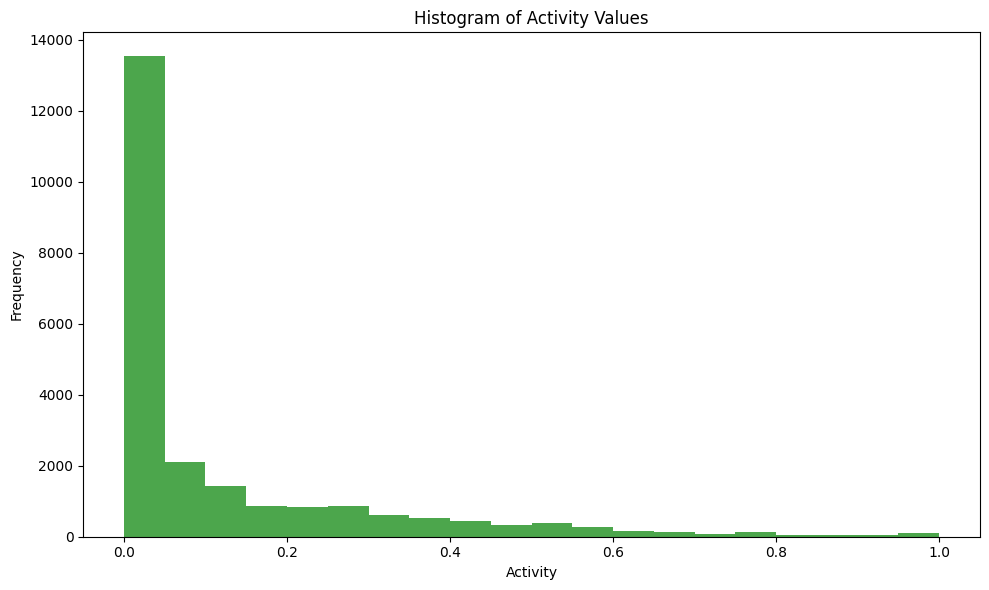

In [15]:
# -----------------------------
# Chart 3: Histograms of relevant variables
# -----------------------------


#Plot Histogram of Features
pd.DataFrame(df_base.variable.value_counts()).plot.bar(title="Histogram of Features", legend=None,figsize=(10,7));

# Plot histogram of mood values
plt.figure(figsize=(10, 6))
plt.hist(df_mood['value'].dropna(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.title('Histogram of Mood Values')
plt.tight_layout()
plt.show()

# Filter for activity recordings only
df_activity = df[df['variable'] == 'activity'].copy()

# Plot histogram of activity values
plt.figure(figsize=(10, 6))
plt.hist(df_activity['value'].dropna(), bins=20, color='green', alpha=0.7)
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.title('Histogram of Activity Values')
plt.tight_layout()
plt.show()



In [30]:
# Filter for screentime recordings only (variable 'screen')
df_screen = df[df['variable'] == 'screen'].copy()

# Create a new column for the date (dropping the time component)
df_screen['date'] = pd.to_datetime(df_screen['time'].dt.date)

# Compute the daily average screentime (in case there are multiple records per day)
daily_avg = df_screen.groupby('date')['value'].mean().reset_index()

# Determine the day of the week (Monday=0, Sunday=6)
daily_avg['dayofweek'] = daily_avg['date'].dt.dayofweek

# Flag weekends (Saturday=5, Sunday=6)
daily_avg['is_weekend'] = daily_avg['dayofweek'] >= 5

# Compute average screentime for weekdays and weekends
weekday_avg = daily_avg.loc[~daily_avg['is_weekend'], 'value'].mean()
weekend_avg = daily_avg.loc[daily_avg['is_weekend'], 'value'].mean()

print("Average Screen Time on Weekdays:", weekday_avg)
print("Average Screen Time on Weekends:", weekend_avg)



# Filter for activity recordings only (variable 'activity')
df_activity = df[df['variable'] == 'activity'].copy()

# Create a new column for the date (dropping the time component)
df_activity['date'] = pd.to_datetime(df_activity['time'].dt.date)

# Compute the daily average activity (in case there are multiple records per day)
daily_avg = df_activity.groupby('date')['value'].mean().reset_index()

# Determine the day of the week (Monday=0, Sunday=6)
daily_avg['dayofweek'] = daily_avg['date'].dt.dayofweek

# Flag weekends (Saturday=5, Sunday=6)
daily_avg['is_weekend'] = daily_avg['dayofweek'] >= 5

# Compute average activity for weekdays and weekends
weekday_avg = daily_avg.loc[~daily_avg['is_weekend'], 'value'].mean()
weekend_avg = daily_avg.loc[daily_avg['is_weekend'], 'value'].mean()

print("Average Activity on Weekdays:", weekday_avg)
print("Average Activity on Weekends:", weekend_avg)

Average Screen Time on Weekdays: 82.61502387272685
Average Screen Time on Weekends: 82.23716150663421
Average Activity on Weekdays: 0.10561957850137103
Average Activity on Weekends: 0.10818977160957573


<ipython-input-61-a81dd68cf3b2>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_wide = df.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()


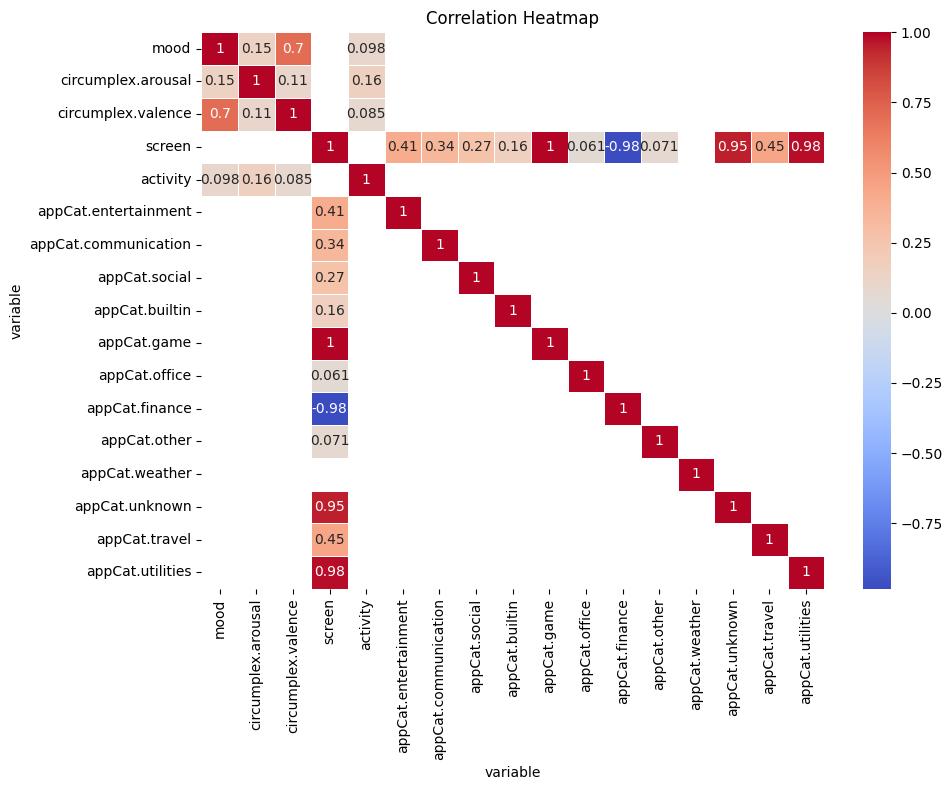

<ipython-input-61-a81dd68cf3b2>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_wide = df.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


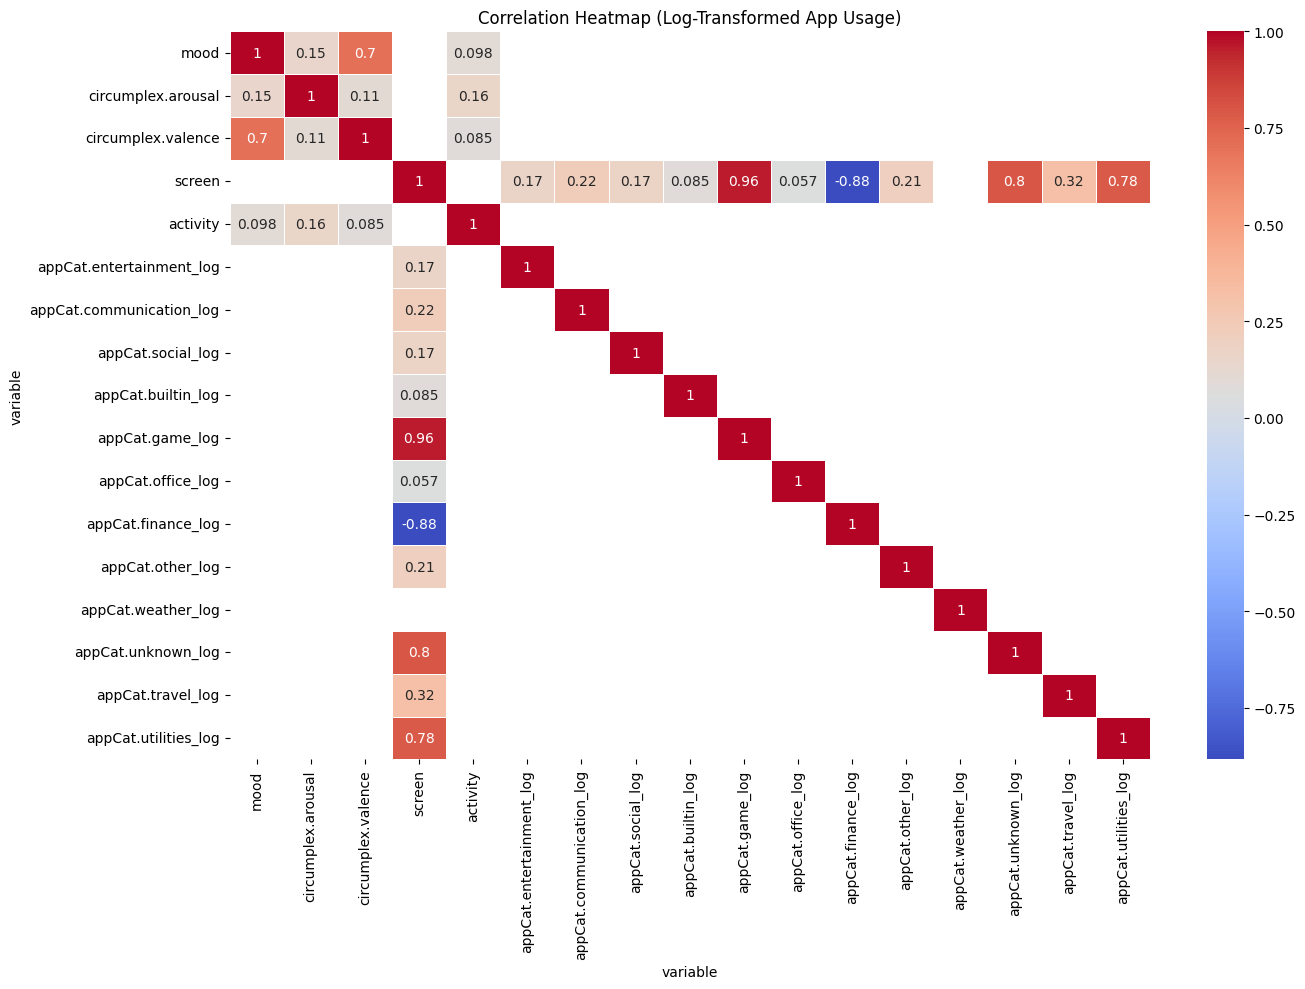

In [61]:
# Pivot the dataset to wide format; each row is an observation, each column a variable.
df_wide = df.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()

# Compute the correlation matrix among key variables (including mood)
# Adjust the list of variables as needed
columns_of_interest = ['mood', 'circumplex.arousal', 'circumplex.valence', 'screen', 'activity', 'appCat.entertainment',
                       'appCat.communication', 'appCat.social', 'appCat.builtin', 'appCat.game', 'appCat.office', 'appCat.finance', 'appCat.other', 'appCat.weather', 'appCat.unknown', 'appCat.travel', 'appCat.utilities']
corr_matrix = df_wide[columns_of_interest].corr()

# Plot the heatmap using the symmetric log scale normalization
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# Pivot to wide format
df_wide = df.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()

# Select variables of interest (feel free to add/remove)
appcat_vars = ['appCat.entertainment',
                       'appCat.communication', 'appCat.social', 'appCat.builtin', 'appCat.game', 'appCat.office', 'appCat.finance', 'appCat.other', 'appCat.weather', 'appCat.unknown', 'appCat.travel', 'appCat.utilities']
for var in appcat_vars:
    if var in df_wide.columns:
        df_wide[f'{var}_log'] = np.log1p(df_wide[var])

# Include mood + circumplex variables + log-transformed app usage
columns_for_corr = ['mood', 'circumplex.arousal', 'circumplex.valence', 'screen', 'activity'] + \
                   [f'{v}_log' for v in appcat_vars if f'{v}_log' in df_wide.columns]

# Compute correlation matrix (Pearson by default)
corr_matrix = df_wide[columns_for_corr].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Log-Transformed App Usage)')
plt.tight_layout()
plt.show()

In [62]:
# First, create a new dataframe dat has multiple indices
df_new = pd.DataFrame(np.nan,
                    index = pd.MultiIndex.from_product([df_base.id.unique(),dates], names = ["ID", "time"]),
                    columns= df_base.variable.unique())


In [18]:
# Filling the DataFrame with the restructured values
count = 0;
for i in ids:
    id_used = df_base[df_base.id == i]
    id_used.index = id_used.time

    for j in score_variables:
        sub_df = id_used[id_used.variable == j].value.resample('D').mean()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            df_new.loc[i, j].loc[k] = sub_df[k]

    for j in other_variables:
        sub_df = id_used[id_used.variable == j].value.resample('D').sum()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            df_new.loc[i, j].loc[k] = sub_df[k]

    print(i)

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and en

AS14.01


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.02


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and en

AS14.03


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.05


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.06


<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.07


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and en

AS14.08


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and en

AS14.09


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.12


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.13


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.14


<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.15


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.16


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and en

AS14.17


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.19


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and en

AS14.20


<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.23


<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.24


<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.25


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.26


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.27


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.28


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.29


<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.30


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.31


<ipython-input-18-3554c40c921d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.32


<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

AS14.33


<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i, j].loc[k] = sub_df[k]
<ipython-input-18-3554c40c921d>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are set

In [19]:
# Adding t column
df_new['t'] = np.nan
count = 0
for i in ids:
    count_days = 0
    for d in dates:
        count_days +=1
        df_new['t'][count] = count_days
        count += 1

Streaming output truncated to the last 5000 lines.
<ipython-input-19-27be9a051056>:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df_new['t'][count] = count_days
<ipython-input-19-27be9a051056>:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df_new['t'][count] = count_days
<ipython-input-19-27be9a051056>:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df_new['t'][count] = count_days
<ipython-input-19-27be9a051056>

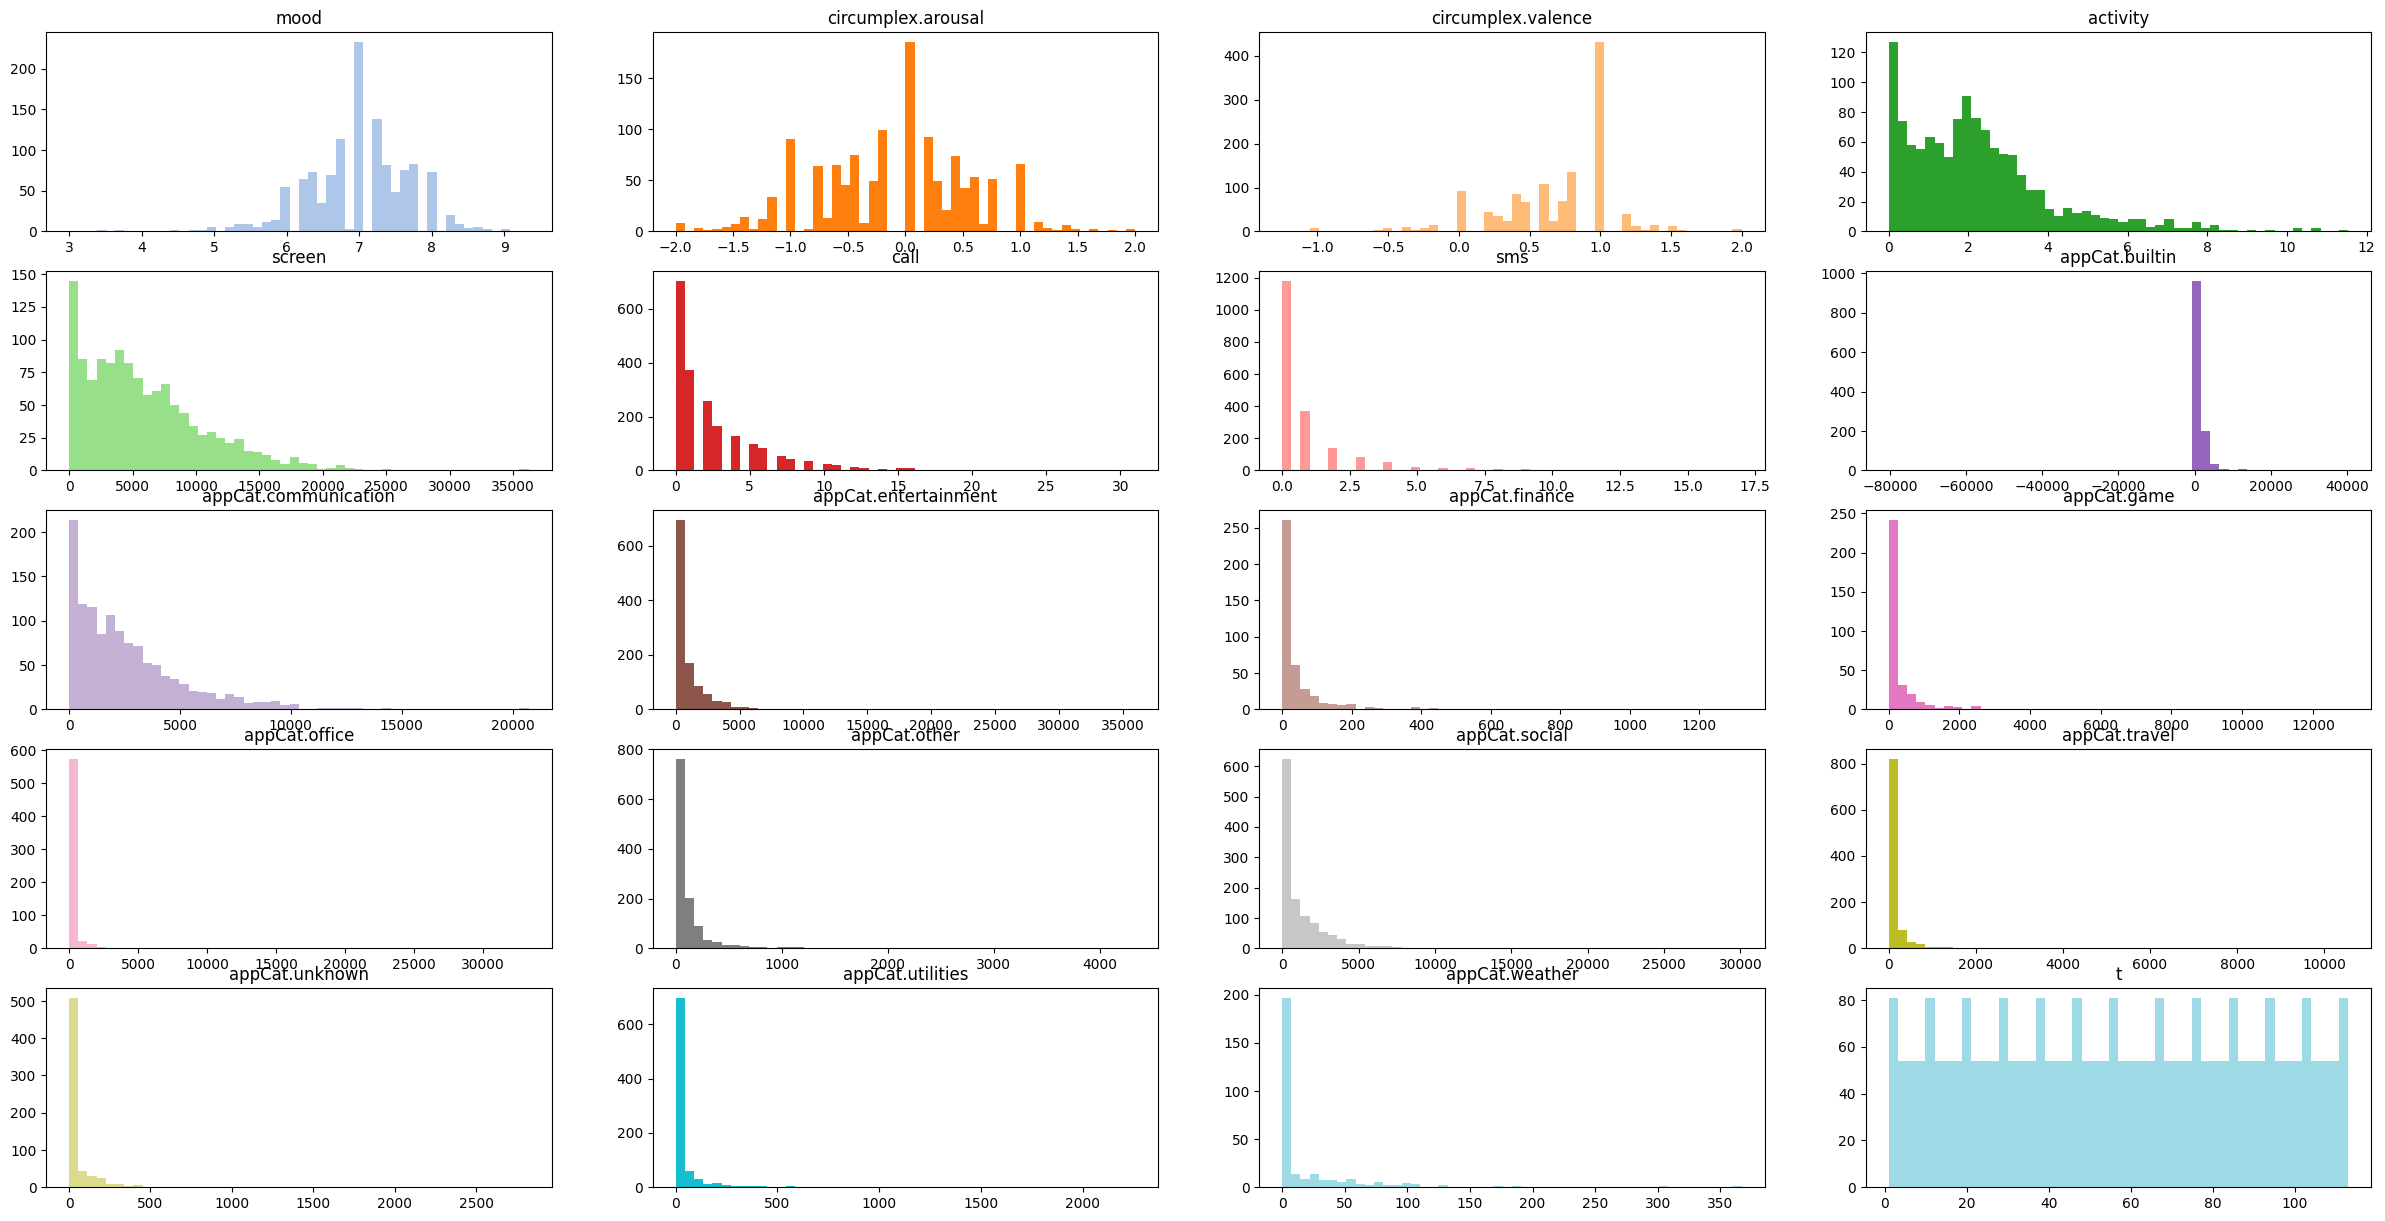

In [21]:
palette = plt.get_cmap('tab20')

num=1
f= plt.figure(figsize=(30,15))
for var in list(df_new.columns.array):
    ax = f.add_subplot(5,4,num)
    a = np.asarray(df_new[var].dropna())
    ax.hist(a, bins=50, color=palette(num))
    ax.set_title(var)
    num+=1

In [22]:
df_new.describe()

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,t
count,1268.000000,1268.000000,1266.000000,1206.000000,1237.000000,2042.000000,1915.000000,1230.000000,1234.000000,1095.000000,418.000000,325.000000,617.000000,1200.000000,1167.000000,972.000000,652.000000,864.000000,292.000000,3051.00000
mean,6.990063,-0.103851,0.687112,2.208115,5881.748977,2.565622,0.938903,1375.870611,2608.916941,930.832901,48.871246,321.176563,206.466948,164.544101,1187.775905,133.899176,65.604713,53.359829,17.595623,57.00000
std,0.736465,0.662715,0.434602,1.795428,4731.232574,3.427109,1.869271,3793.920938,2474.806134,1764.672253,119.906806,940.003264,1440.458239,384.271423,1892.696108,501.508817,216.898841,173.967160,39.808478,32.62436
min,3.000000,-2.000000,-1.250000,0.000000,0.000000,0.000000,0.000000,-80367.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,6.600000,-0.600000,0.400000,0.857670,2261.391001,0.000000,0.000000,236.363000,746.281250,15.709500,0.000000,0.000000,0.000000,40.682500,68.987000,0.000000,0.000000,0.000000,0.000000,29.00000
50%,7.000000,0.000000,0.800000,1.941667,4942.536000,1.000000,0.000000,726.573000,1990.120000,364.104000,0.000000,48.879000,0.000000,61.490500,509.768000,0.000000,0.000000,1.002500,0.000000,57.00000
75%,7.500000,0.400000,1.000000,2.999004,8390.178000,4.000000,1.000000,1527.240000,3705.815500,1168.583500,49.358750,275.675000,51.786000,127.790000,1675.439500,121.350500,41.681750,26.567000,20.300500,85.00000
max,9.333333,2.000000,2.000000,11.535524,36204.105001,31.000000,17.000000,40323.877000,20718.749000,35937.645000,1321.104000,12996.495000,33283.021000,4335.307000,30073.421000,10548.116000,2821.547000,2257.626000,366.937000,113.00000


In [25]:
count=0
for i in range(len(df_new)):
    if df_new['appCat.builtin'][i]<0:
        count+=1
        df_new['appCat.builtin'][i]=np.nan
print('Number of removed values: {}'.format(count))

Number of removed values: 0


<ipython-input-25-837679ac4319>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_new['appCat.builtin'][i]<0:


In [28]:
#Dropping entries where a participant has more than 2 consecutive days with missing mood data.

for i in ids:
    count = 0
    deathrow = []

    for j in np.array(dates.strftime('%Y-%m-%d')):
        if np.isnan(df_new.loc[i,'mood'][j]):
            count += 1
            deathrow.append(j)
            if j == np.array(dates.strftime('%Y-%m-%d'))[-1]:
                for d in deathrow:
                    df_new = df_new.drop((i, d))

                deathrow = []
                count = 0
        else:
            if count > 2:
                for d in deathrow:
                    df_new = df_new.drop((i, d))
            deathrow = []
            count = 0

    print('Participant: ',i)

Participant:  AS14.01
Participant:  AS14.02
Participant:  AS14.03
Participant:  AS14.05
Participant:  AS14.06
Participant:  AS14.07
Participant:  AS14.08
Participant:  AS14.09
Participant:  AS14.12
Participant:  AS14.13
Participant:  AS14.14
Participant:  AS14.15
Participant:  AS14.16
Participant:  AS14.17
Participant:  AS14.19
Participant:  AS14.20
Participant:  AS14.23
Participant:  AS14.24
Participant:  AS14.25
Participant:  AS14.26
Participant:  AS14.27
Participant:  AS14.28
Participant:  AS14.29
Participant:  AS14.30
Participant:  AS14.31
Participant:  AS14.32
Participant:  AS14.33


In [63]:
#merge columns
df_new['appCat.professional'] = df_new[['appCat.office', 'appCat.finance']].sum(axis=1, skipna=True)
df_new['appCat.recreation'] = df_new[['appCat.game','appCat.entertainment','appCat.social']].sum(axis=1, skipna=True)
df_new['appCat.convenience'] = df_new[['appCat.travel','appCat.utilities','appCat.weather']].sum(axis=1, skipna=True)
df_new['appCat.convenience'] = df_new[['appCat.other','appCat.unknown']].sum(axis=1, skipna=True)
column_names = ['appCat.builtin','appCat.entertainment','appCat.finance','appCat.game','appCat.office','appCat.other','appCat.social','appCat.travel','appCat.unknown','appCat.utilities','appCat.weather']
df_new = df_new.drop(columns=column_names, axis=1)


In [32]:
df_backup = df

In [33]:
df_new.isna().sum()

,0
mood,25
circumplex.arousal,25
circumplex.valence,27
activity,102
screen,72
call,86
sms,131
appCat.communication,75
t,0
appCat.professional,0


In [34]:
df_inter = df_new.interpolate(axis=0)

In [35]:
df_inter.isna().sum()

,0
mood,0
circumplex.arousal,0
circumplex.valence,0
activity,2
screen,2
call,0
sms,0
appCat.communication,2
t,0
appCat.professional,0


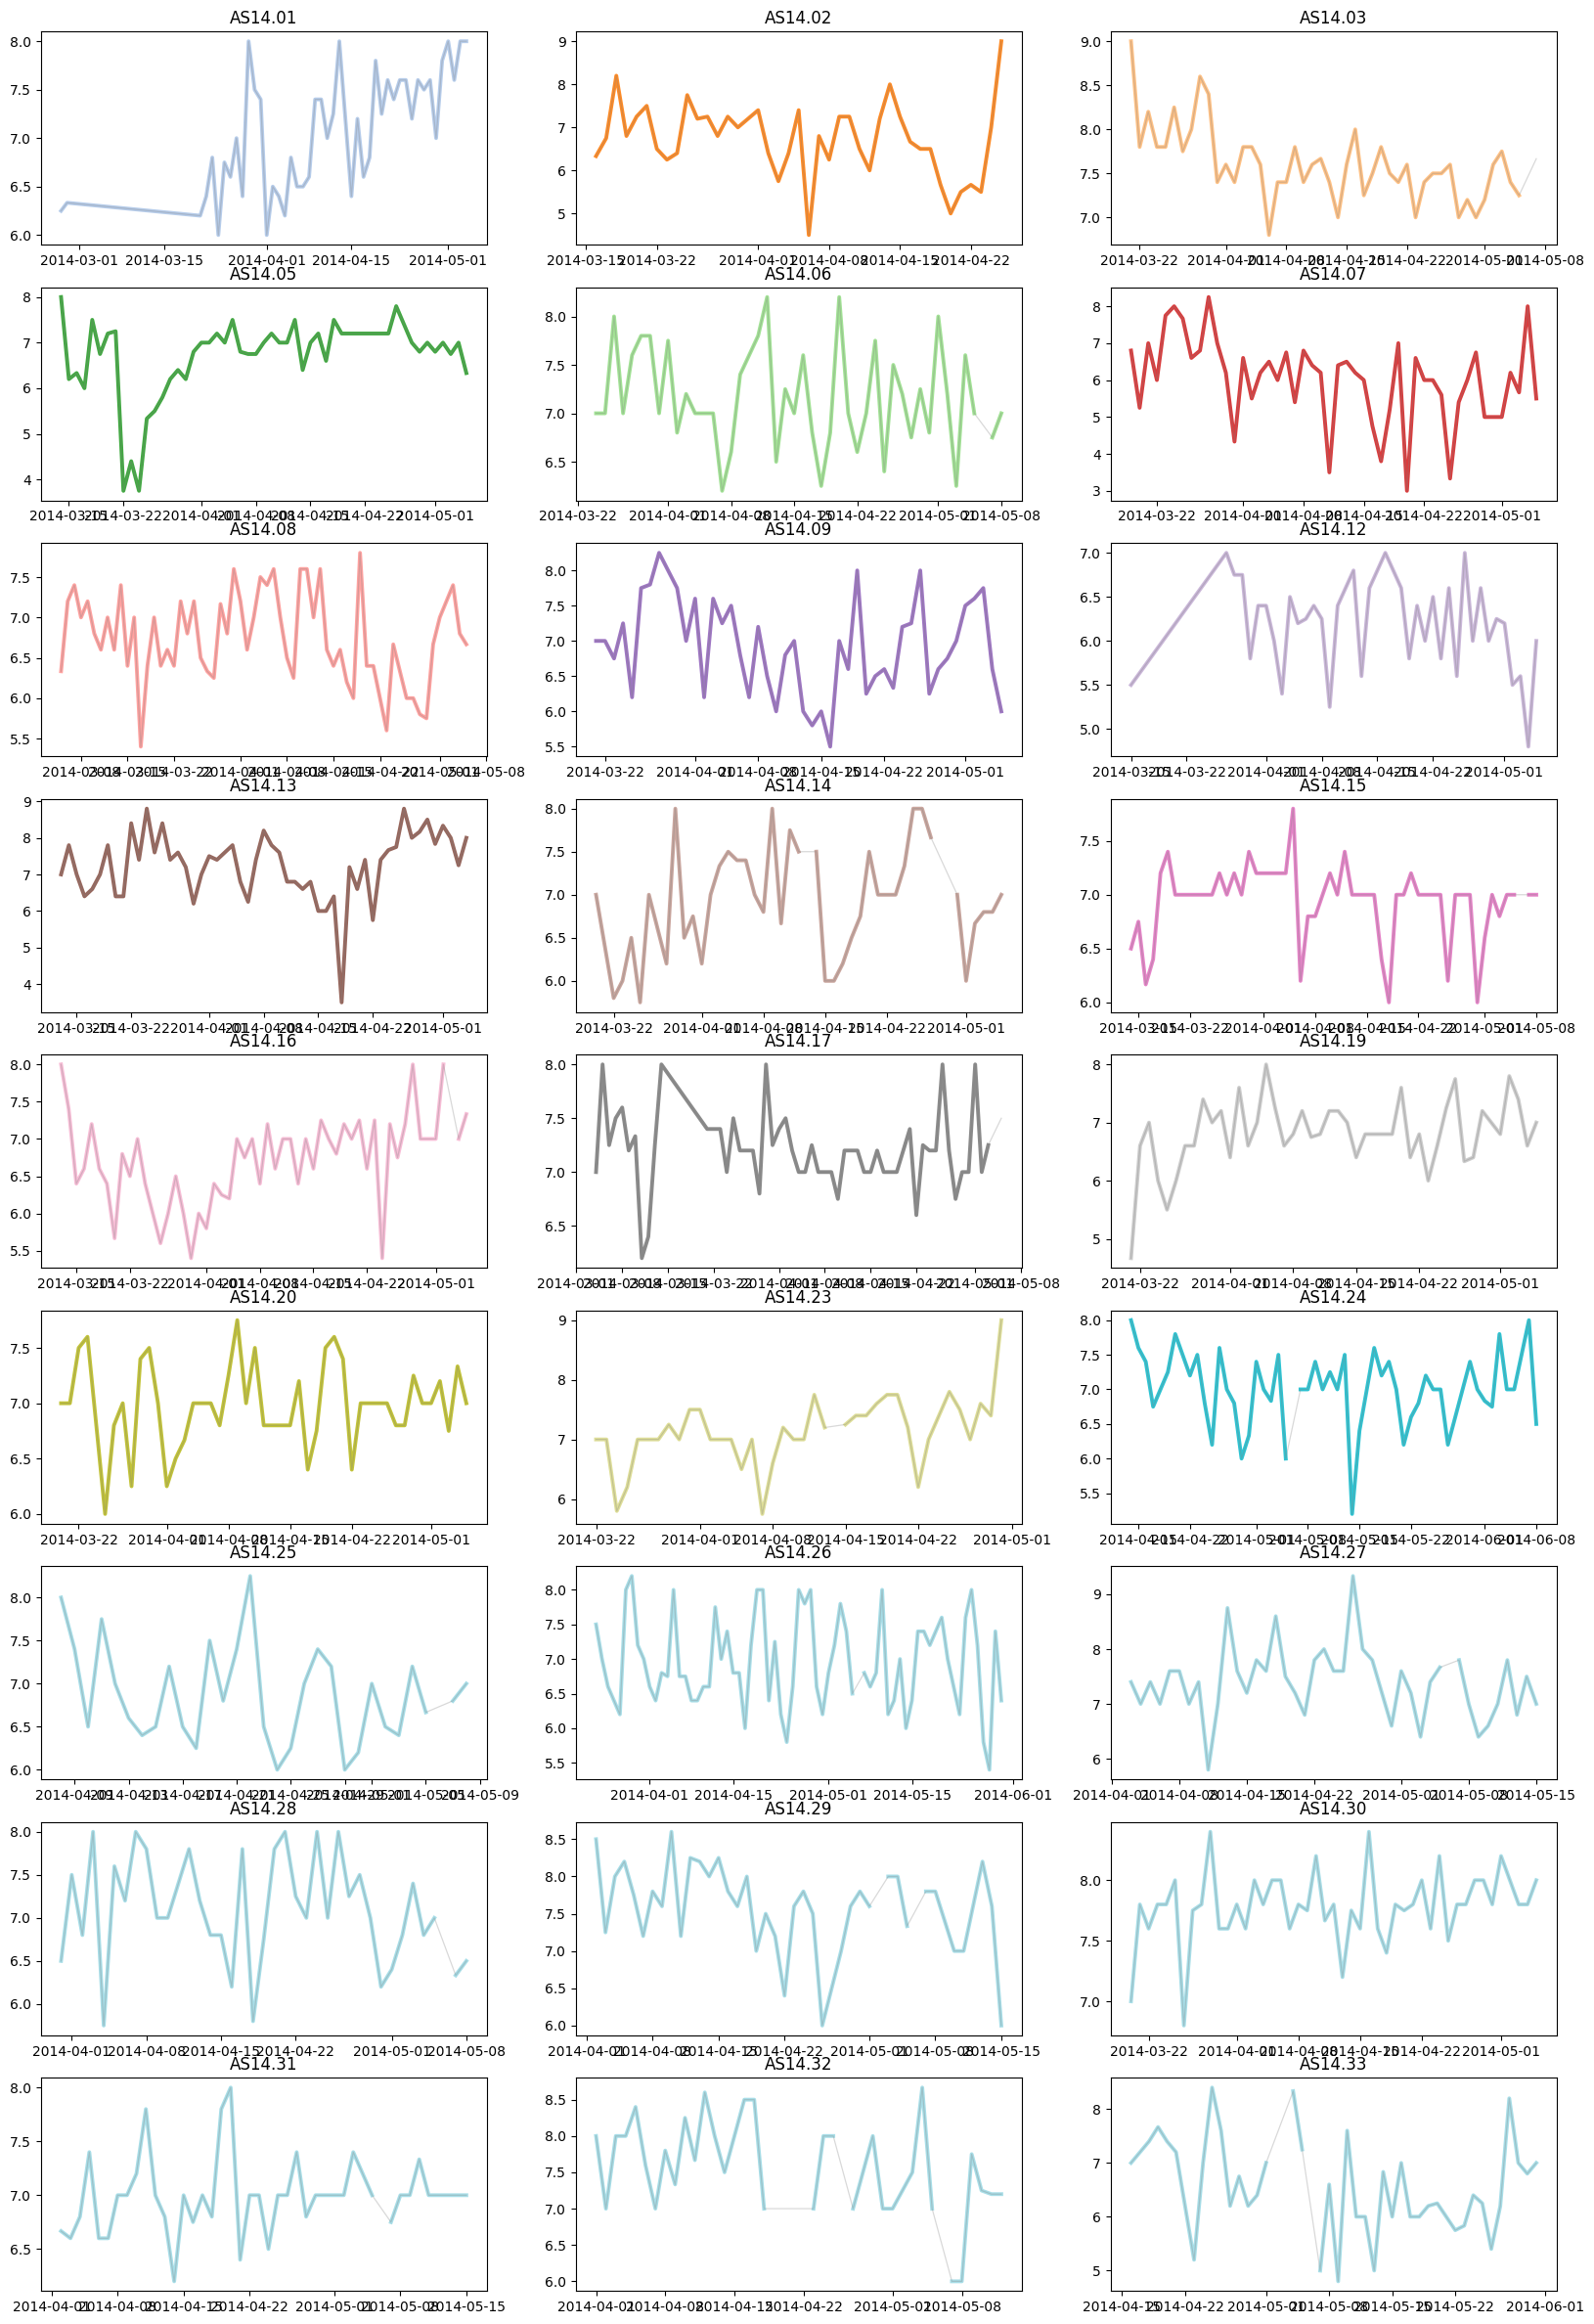

In [36]:
#comparing normal data with interpolated data
palette = plt.get_cmap('tab20')

f = plt.figure(figsize=(20,30))
num=0
for i in list(df_new.index.levels[0]):
    num+=1
    ax = f.add_subplot(9,3, num)
    ax.set_title(i)
    ax.plot(df_new.loc[i,'mood'], marker='', color=palette(num), linewidth=2.8, alpha=0.9, label=i)
    ax.plot(df_inter.loc[i,'mood'], marker='', color='grey', linewidth=0.9, alpha=0.3)

In [37]:
df_new = df_inter

In [40]:
df_new.loc['AS14.12','2014-03-15'] = np.nan
df_new.loc['AS14.01','2014-02-26'] = np.nan
df_new.loc['AS14.01','2014-02-27'] = np.nan
df_new.dropna(subset=['mood'], inplace=True)

In [41]:
#Create this for temporal dataset and benchmark
df_temporal = df_new
df_benchmark = df_new

In [42]:
df_backup = df_new

In [43]:
df_new.reset_index(inplace=True)
df_new.set_index(['ID','time','t'],inplace=True,drop=True)
new_variables = np.array(df_new.columns[np.arange(0,len(df_new.columns)).tolist()])

In [44]:
df_new.reset_index(inplace=True)
df_new.set_index(['ID','t'],inplace=True,drop=True)
print('This may take a while, right now we finished:')

for var in new_variables:
        df_new[str(var)+'_3dayavg'] = np.nan

for i in ids:
    for var in new_variables:
        a = df_new.loc[i].index
        for j in np.arange(3,len(a)):
            df_new.loc[i,str(var)+'_3dayavg'][a[j]] = (df_new.loc[i,var][a[j-1]]+df_new.loc[i,var][a[j-2]]+df_new.loc[i,var][a[j-3]])/3

    print('Participant: ',i)

This may take a while, right now we finished:


<ipython-input-44-573b0b0d0573>:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new.loc[i,str(var)+'_3dayavg'][a[j]] = (df_new.loc[i,var][a[j-1]]+df_new.loc[i,var][a[j-2]]+df_new.loc[i,var][a[j-3]])/3
<ipython-input-44-573b0b0d0573>:12:

Participant:  AS14.01
Participant:  AS14.02
Participant:  AS14.03
Participant:  AS14.05
Participant:  AS14.06
Participant:  AS14.07
Participant:  AS14.08
Participant:  AS14.09
Participant:  AS14.12


<ipython-input-44-573b0b0d0573>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[i,str(var)+'_3dayavg'][a[j]] = (df_new.loc[i,var][a[j-1]]+df_new.loc[i,var][a[j-2]]+df_new.loc[i,var][a[j-3]])/3
<ipython-input-44-573b0b0d0573>:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to

Participant:  AS14.13
Participant:  AS14.14
Participant:  AS14.15


<ipython-input-44-573b0b0d0573>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[i,str(var)+'_3dayavg'][a[j]] = (df_new.loc[i,var][a[j-1]]+df_new.loc[i,var][a[j-2]]+df_new.loc[i,var][a[j-3]])/3
<ipython-input-44-573b0b0d0573>:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to

Participant:  AS14.16
Participant:  AS14.17
Participant:  AS14.19
Participant:  AS14.20
Participant:  AS14.23
Participant:  AS14.24
Participant:  AS14.25
Participant:  AS14.26
Participant:  AS14.27
Participant:  AS14.28
Participant:  AS14.29
Participant:  AS14.30
Participant:  AS14.31
Participant:  AS14.32
Participant:  AS14.33


In [45]:
#Drop old variables
df_new = df_new.drop(df_new.columns[np.arange(2,len(new_variables)+1)], axis=1)

In [47]:
df_new.reset_index(inplace=True)
df_new.set_index(['ID','time'],inplace=True,drop=True)
pd.options.mode.chained_assignment = None
df_new['weekend'] = 0
days = df_new.index.get_level_values(1).weekday
for i in range(len(df_new)):
    if days[i] == 5 or days[i] == 6:
        df_new['weekend'][i] = 1

<ipython-input-47-9437d242eace>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new['weekend'][i] = 1
<ipython-input-47-9437d242eace>:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, int

In [51]:
df_backup = df_new

In [69]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

df_scale = df_new
df_scale.reset_index(inplace=True)
df_scale.set_index(['ID','time','t'],inplace=True,drop=True)

minmaxscaler = MinMaxScaler()
for i in ids:
    df_scale.loc[i] = minmaxscaler.fit_transform(df_scale.loc[i])

In [70]:
df_new = df_scale

In [71]:
df_new.to_csv('df_nontemporal.csv')

In [74]:
df_benchmark['pred'] = np.nan
minmaxscaler = MinMaxScaler()

for i in ids:
        df_benchmark.loc[i] = minmaxscaler.fit_transform(df_benchmark.loc[i])
        a = df_benchmark.loc[i].index
        for j in np.arange(1,len(a)):
            df_benchmark.loc[i,'pred'][a[j]] = df_benchmark.loc[i,'mood'][a[j-1]]

df_benchmark = df_benchmark[['mood','pred']]
df_benchmark.dropna(inplace=True)

t_test = np.array(df_benchmark['mood'])
t_pred = np.array(df_benchmark['pred'])

KeyError: 'AS14.01'

In [75]:
df_hallo = df_temporal

In [76]:
df_temporal.reset_index(drop=False,inplace=True)
df_temporal.set_index(['ID','time'],inplace=True)
minmaxscaler = MinMaxScaler()
#create new t column for temporal
for i in ids:
        df_temporal.loc[i] = minmaxscaler.fit_transform(df_temporal.loc[i])
        a = df_temporal.loc[i].index
        for j in np.arange(0,len(a)):
            df_temporal.loc[i,'t'][a[j]] = j+1

#Add weekend dummy
pd.options.mode.chained_assignment = None
df_temporal['weekend'] = 0
days = df_temporal.index.get_level_values(1).weekday
for i in range(len(df_temporal)):
    if days[i] == 5 or days[i] == 6:
        df_temporal['weekend'][i] = 1

df_temporal.reset_index(drop=False,inplace=True)
df_temporal.drop(['pred'], axis=1, inplace=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
<ipython-input-76-0af43aeebd57>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.         0.02272727 0.04545455 0.06818182 0.09090909 0.11363636
 0.13636364 0.15909091 0.18181818 0.20454545 0.22727273 0.25
 0.27272727 0.29545455 0.31818182 0.34090909 0.36363636 0.38636364
 0.40909091 0.43181818 0.45454545 0.47727273 0.5        0.52272727
 0.54545455 0.56818182 0.59090909 0.61363636 0.63636364 0.65909091
 0.68181818 0.70454545 0.72727273 0.75       0.77272727 0.79545455
 0.81818182 0.84090909 0.86363636 0.88636364 0.90909091 0.93181818
 0.95454545 0.97727273 1.        ]' has dtype i

In [77]:
df_temporal.to_csv('df_temporal.csv')